**Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
path = "/content/WebScrap_OLX_Rumah_Jkt_Final.csv"
df = pd.read_csv(path)
df.head()

,Jumlah_Kamar,Jumlah_Kamar_Mandi,Jumlah_Lantai,Luas_Bangunan,Luas_Tanah,Sertifikasi,Lokasi,Harga
0,6,1,1,148,148,SHM,Setia Budi,1100000000
1,5,4,3,84,200,SHM,Tebet,2100000000
2,3,3,2,134,130,SHM,Pasar Minggu,2800000000
3,3,2,1,132,100,SHM,Pesanggrahan,1480000000
4,3,4,2,92,147,SHM,Pesanggrahan,2300000000


In [ ]:
print("Kolom : ", df.shape[1])
print("Baris : ", df.shape[0])

Kolom :  8
Baris :  238


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Jumlah_Kamar        238 non-null    int64 
 1   Jumlah_Kamar_Mandi  238 non-null    int64 
 2   Jumlah_Lantai       238 non-null    int64 
 3   Luas_Bangunan       238 non-null    int64 
 4   Luas_Tanah          238 non-null    int64 
 5   Sertifikasi         238 non-null    object
 6   Lokasi              238 non-null    object
 7   Harga               238 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 15.0+ KB


# **EDA, Visualisasi dan Korelasi**

**Normalisasi Data**

In [ ]:
print(df.isnull().sum())

Jumlah_Kamar          0
Jumlah_Kamar_Mandi    0
Jumlah_Lantai         0
Luas_Bangunan         0
Luas_Tanah            0
Sertifikasi           0
Lokasi                0
Harga                 0
dtype: int64


<Axes: >

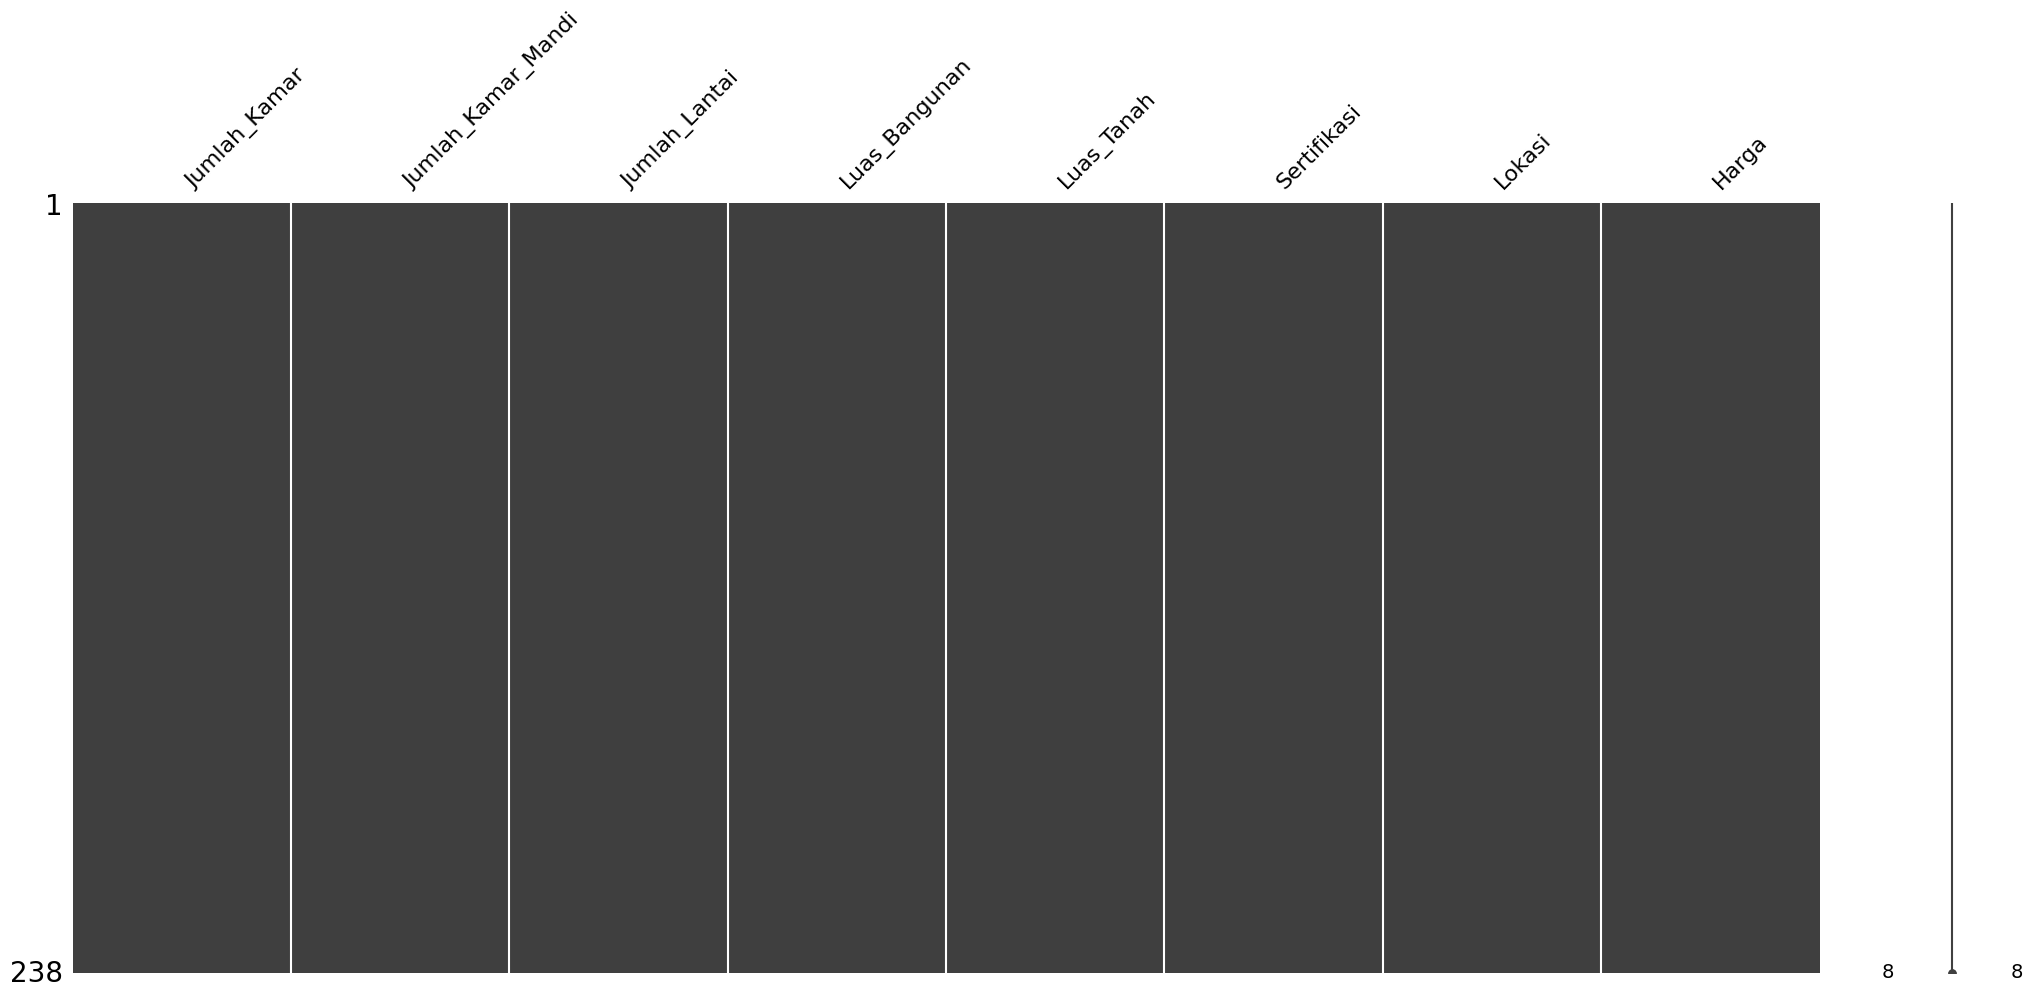

In [ ]:
msno.matrix(df)

In [ ]:
duplicate_count = df.duplicated().sum()
print("Number of duplicates: ", duplicate_count)

Number of duplicates:  0


In [ ]:
df.columns = df.columns.str.replace('_', ' ').str.title()
print(df.columns)

Index(['Jumlah Kamar', 'Jumlah Kamar Mandi', 'Jumlah Lantai', 'Luas Bangunan',
       'Luas Tanah', 'Sertifikasi', 'Lokasi', 'Harga'],
      dtype='object')


In [ ]:
column = ['Jumlah Kamar', 'Jumlah Kamar Mandi', 'Jumlah Lantai', 'Luas Bangunan',
       'Luas Tanah', 'Sertifikasi', 'Lokasi', 'Harga']

## Exploratory Data Analysis

### Statistik Deskriptif

In [ ]:
df.describe().round(2)

,Jumlah Kamar,Jumlah Kamar Mandi,Jumlah Lantai,Luas Bangunan,Luas Tanah,Harga
count,238.00,238.00,238.00,238.00,238.00,2.380000e+02
mean,2.99,2.27,1.77,81.20,88.82,1.150313e+09
std,0.81,0.97,0.59,29.66,41.14,6.652019e+08
min,2.00,1.00,1.00,15.00,26.00,5.000000e+06
25%,2.00,2.00,1.00,60.00,55.25,6.250000e+08
50%,3.00,2.00,2.00,72.00,82.00,1.100000e+09
75%,3.00,3.00,2.00,94.00,120.00,1.600000e+09
max,6.00,4.00,3.00,200.00,200.00,2.900000e+09


In [ ]:
df.describe(include=["object"])

,Sertifikasi,Lokasi
count,238,238
unique,3,9
top,SHM,Pesanggrahan
freq,232,46


In [ ]:
df["Harga"].value_counts(normalize=True)

Harga
1600000000    0.063025
1100000000    0.037815
1500000000    0.033613
1300000000    0.029412
600000000     0.029412
                ...   
1299000000    0.004202
1175000000    0.004202
1200000004    0.004202
150500611     0.004202
575000000     0.004202
Name: proportion, Length: 133, dtype: float64

In [ ]:
df1 = df.copy()
df1.head()

,Jumlah Kamar,Jumlah Kamar Mandi,Jumlah Lantai,Luas Bangunan,Luas Tanah,Sertifikasi,Lokasi,Harga
0,6,1,1,148,148,SHM,Setia Budi,1100000000
1,5,4,3,84,200,SHM,Tebet,2100000000
2,3,3,2,134,130,SHM,Pasar Minggu,2800000000
3,3,2,1,132,100,SHM,Pesanggrahan,1480000000
4,3,4,2,92,147,SHM,Pesanggrahan,2300000000


## Univariate Analysis

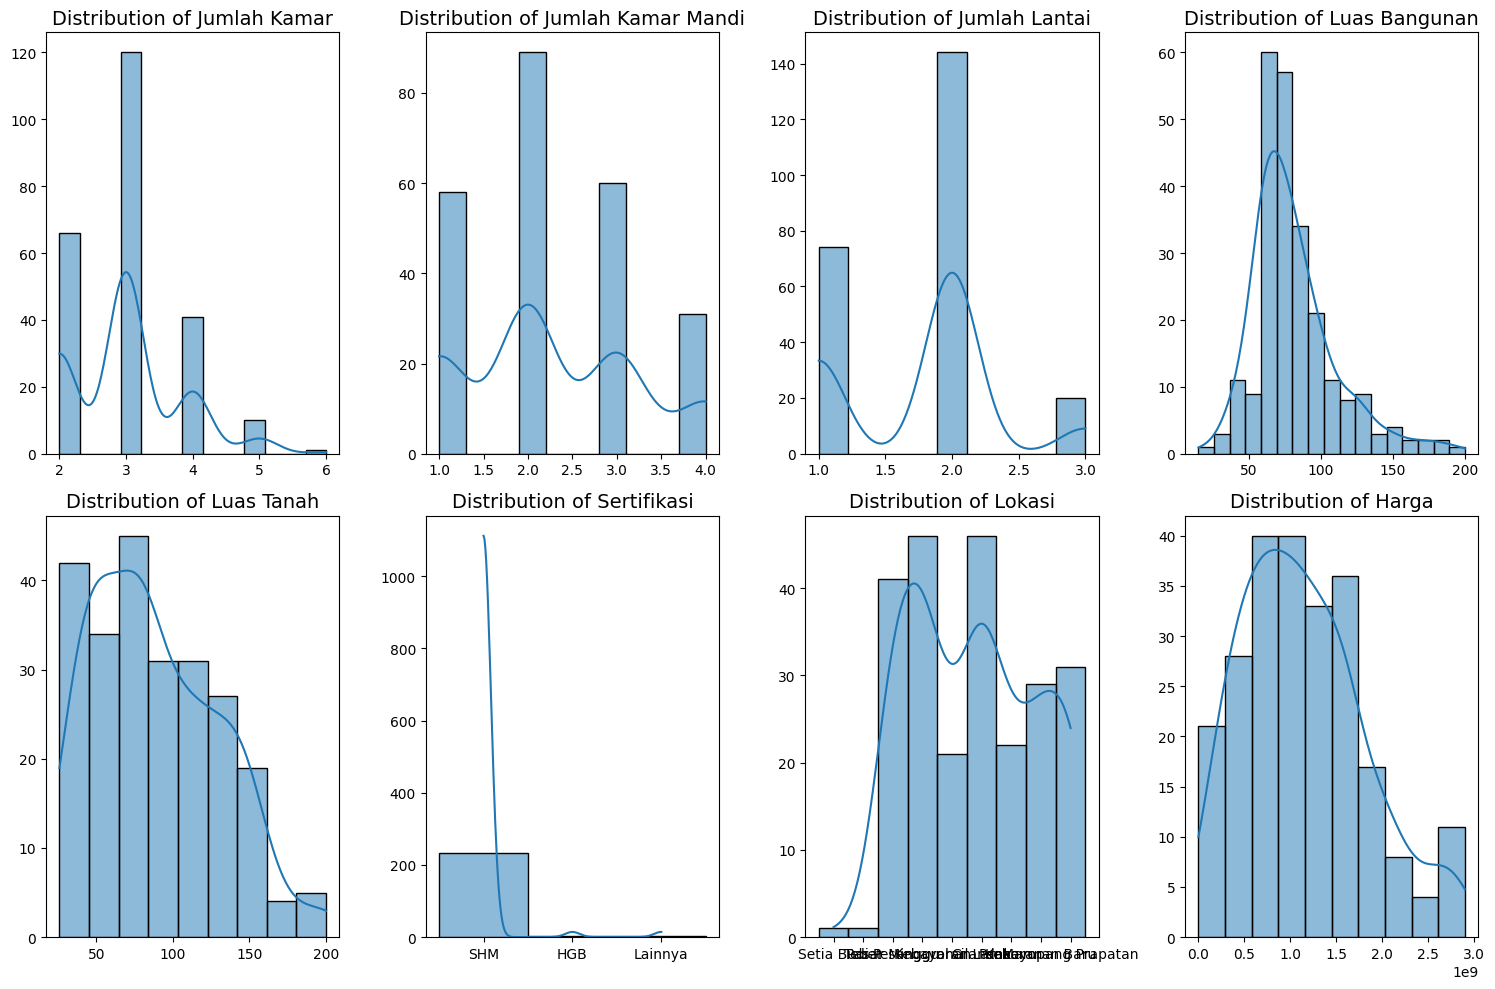

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axes = axes.ravel()
for i, col in enumerate(column):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()

## Multivariate Analysis

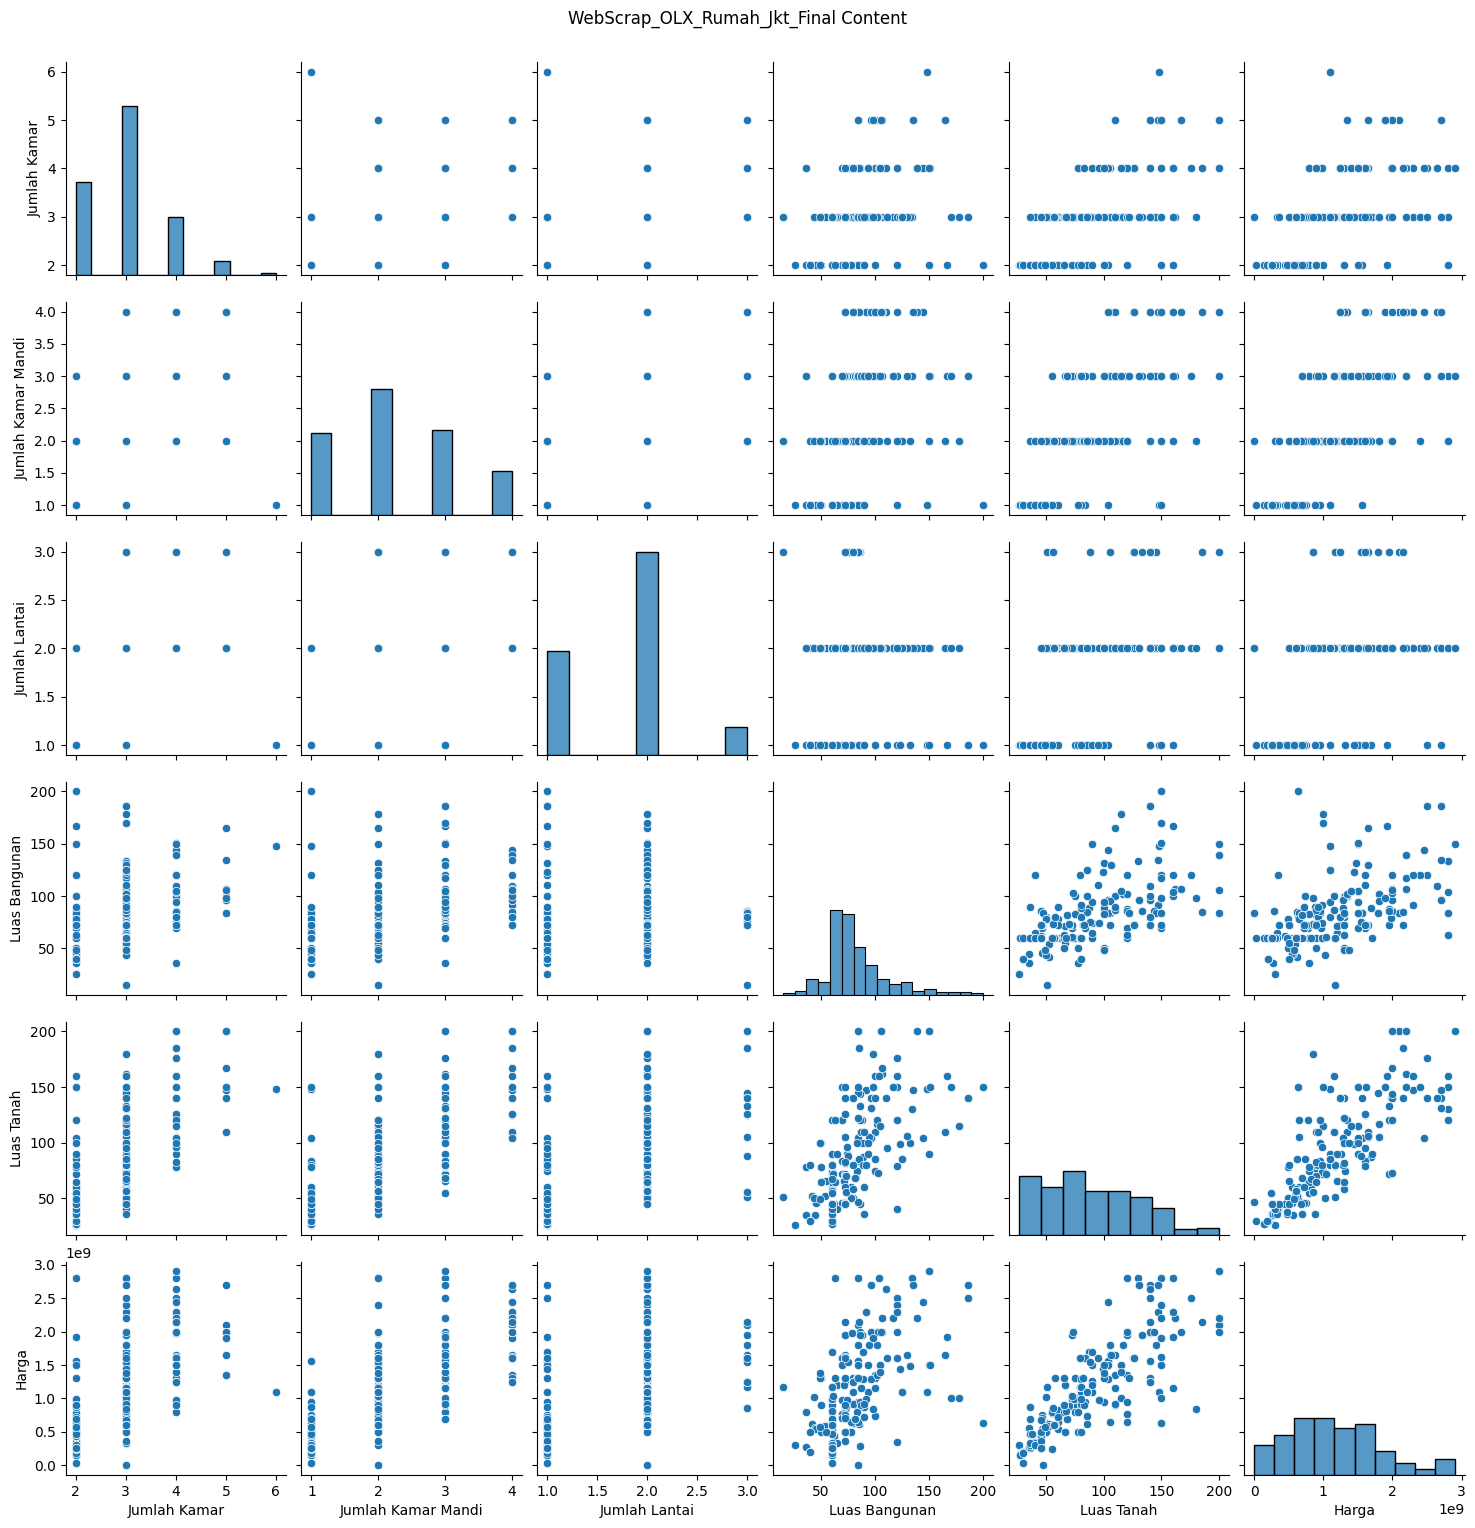

In [ ]:
multivariate_data = df1[column]

sns.pairplot(multivariate_data)
plt.suptitle('WebScrap_OLX_Rumah_Jkt_Final Content', y=1.02)
plt.show()

Pengubahan kolom Sertifikasi dan Lokasi dari string ke numeric dengan fungsi factorize().

In [ ]:
bool_columns = df1.select_dtypes(include='bool').columns
df1[bool_columns] = df1[bool_columns].astype(float)
for col in ['Sertifikasi','Lokasi']:
    df1[col] = pd.factorize(df1[col])[0]
print(df1.head())

   Jumlah Kamar  Jumlah Kamar Mandi  Jumlah Lantai  Luas Bangunan  Luas Tanah  \
0             6                   1              1            148         148   
1             5                   4              3             84         200   
2             3                   3              2            134         130   
3             3                   2              1            132         100   
4             3                   4              2             92         147   

   Sertifikasi  Lokasi       Harga  
0            0       0  1100000000  
1            0       1  2100000000  
2            0       2  2800000000  
3            0       3  1480000000  
4            0       3  2300000000  


Pengubahan tipe data kolom Sertifikasi dan Lokasi dari int ke float.

In [ ]:
# df1['Sertifikasi'] = df1['Sertifikasi'].astype(float)
# df1['Lokasi'] = df1['Lokasi'].astype(float)
# print(df1.head())

   Jumlah Kamar  Jumlah Kamar Mandi  Jumlah Lantai  Luas Bangunan  Luas Tanah  \
0             6                   1              1            148         148   
1             5                   4              3             84         200   
2             3                   3              2            134         130   
3             3                   2              1            132         100   
4             3                   4              2             92         147   

   Sertifikasi  Lokasi       Harga  
0          0.0     0.0  1100000000  
1          0.0     1.0  2100000000  
2          0.0     2.0  2800000000  
3          0.0     3.0  1480000000  
4          0.0     3.0  2300000000  


In [ ]:
df1

,Jumlah Kamar,Jumlah Kamar Mandi,Jumlah Lantai,Luas Bangunan,Luas Tanah,Sertifikasi,Lokasi,Harga
0,6,1,1,148,148,0.0,0.0,1100000000
1,5,4,3,84,200,0.0,1.0,2100000000
2,3,3,2,134,130,0.0,2.0,2800000000
3,3,2,1,132,100,0.0,3.0,1480000000
4,3,4,2,92,147,0.0,3.0,2300000000
...,...,...,...,...,...,...,...,...
233,2,1,1,60,45,0.0,6.0,265000000
234,2,1,1,60,45,0.0,2.0,265000000
235,2,2,2,63,120,0.0,3.0,2800000000
236,4,3,2,150,200,0.0,2.0,2900000000


## Korelasi

<Axes: >

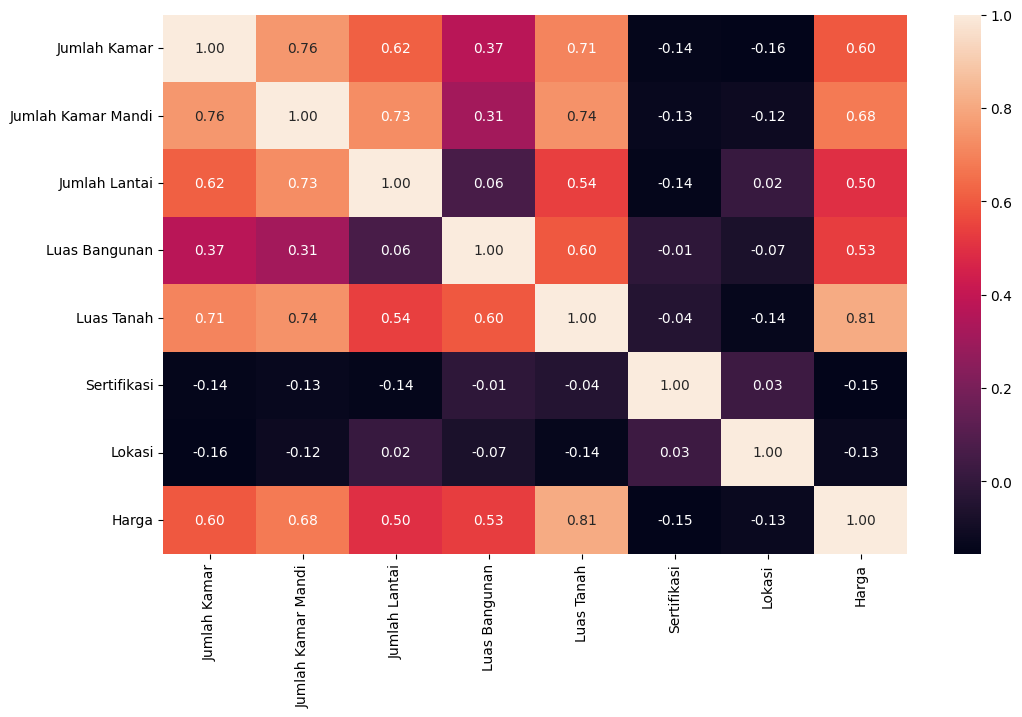

In [ ]:
plt.figure(figsize=(12, 7))
corr = df1[column].corr()
sns.heatmap(corr, annot=True, fmt=".2f")

Cek korelasi banyak variabel(kolom) dengan target harga, didapatkan bahwa Luas Tanah memiliki korelasi positif tertinggi dengan Harga.

In [ ]:
corr_matrix = df1.corr(numeric_only=True)
price_correlation = corr_matrix["Harga"].sort_values(ascending=False)
print(price_correlation)

Harga                 1.000000
Luas Tanah            0.809030
Jumlah Kamar Mandi    0.677947
Jumlah Kamar          0.595801
Luas Bangunan         0.533849
Jumlah Lantai         0.496634
Lokasi               -0.128033
Sertifikasi          -0.150977
Name: Harga, dtype: float64


# Model Regresi Linier Sederhana

In [ ]:
np.random.seed(42)
split = np.random.rand(len(df)) < 0.8
train = df1[split]
test = df1[~split]

In [ ]:
X_train = np.asanyarray(train[['Luas Tanah']])
y_train = np.asanyarray(train[['Harga']])

X_test = np.asanyarray(test[['Luas Tanah']])
y_test = np.asanyarray(test[['Harga']])

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print ('Coefficients: ', lr_model.coef_)
print ('Intercept: ', lr_model.intercept_)

Coefficients:  [[12917901.5381186]]
Intercept:  [-6299488.80305219]


<Figure size 1200x700 with 0 Axes>

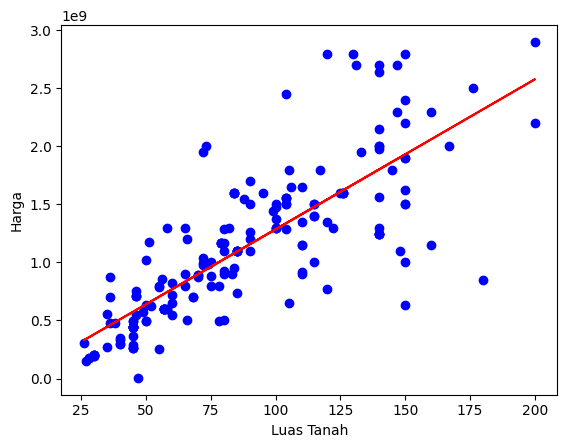

<Figure size 1200x700 with 0 Axes>

In [ ]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, lr_model.coef_[0][0]*X_train + lr_model.intercept_[0], '-r')
plt.xlabel('Luas Tanah')
plt.ylabel('Harga')
fig = plt.gcf()
plt.figure(figsize=(12,7))

In [ ]:
y_pred = lr_model.predict(X_test)

print('Data asli: \n', y_test[0:10])
print('\n')
print('Hasil prediksi: \n', y_pred[0:10])

Data asli: 
 [[2100000000]
 [  30000000]
 [1650000000]
 [1690000000]
 [ 150500000]
 [ 285000000]
 [ 265000000]
 [1600000000]
 [1600000000]
 [1600000000]]


Hasil prediksi: 
 [[2.57728082e+09]
 [3.81237557e+08]
 [1.35008017e+09]
 [1.11755795e+09]
 [3.42483853e+08]
 [5.75006080e+08]
 [4.58744967e+08]
 [1.07880424e+09]
 [1.62135610e+09]
 [1.62135610e+09]]


In [ ]:
predict = lr_model.predict(X_test)

for i, hasil_predict in enumerate(predict):
    print(f"Prediksi untuk Luas Tanah {X_test[i][0]}: {hasil_predict[0]}")

Prediksi untuk Luas Tanah 200: 2577280818.8206673
Prediksi untuk Luas Tanah 30: 381237557.3405057
Prediksi untuk Luas Tanah 105: 1350080172.6994004
Prediksi untuk Luas Tanah 87: 1117557945.0132658
Prediksi untuk Luas Tanah 27: 342483852.7261499
Prediksi untuk Luas Tanah 45: 575006080.4122847
Prediksi untuk Luas Tanah 36: 458744966.5692173
Prediksi untuk Luas Tanah 84: 1078804240.39891
Prediksi untuk Luas Tanah 126: 1621356104.999891
Prediksi untuk Luas Tanah 126: 1621356104.999891
Prediksi untuk Luas Tanah 126: 1621356104.999891
Prediksi untuk Luas Tanah 126: 1621356104.999891
Prediksi untuk Luas Tanah 70: 897953618.8652496
Prediksi untuk Luas Tanah 120: 1543848695.7711794
Prediksi untuk Luas Tanah 85: 1091722141.9370286
Prediksi untuk Luas Tanah 46: 587923981.9504033
Prediksi untuk Luas Tanah 66: 846282012.7127752
Prediksi untuk Luas Tanah 131: 1685945612.690484
Prediksi untuk Luas Tanah 75: 962543126.5558426
Prediksi untuk Luas Tanah 131: 1685945612.690484
Prediksi untuk Luas Tanah 1

# Evaluasi Model menggunakan RMSE

In [ ]:
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predict)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error: 1.629988829254789e+17
R^2 Score: 0.697137262077917
Root Mean Squared Error (RMSE): 403731201.3276642


Hasil RMSE yang didapatkan sekitar 403 juta menunjukkan tingkat kesalahan rata-rata prediksi model regresi linier dalam satuan harga. Nilai RMSE ini berarti bahwa rata-rata prediksi model meleset sekitar 403 juta dari nilai harga yang sebenarnya.